In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

File ‘AirlineTweets.csv’ already there; not retrieving.



In [2]:
import pandas as pd

df = pd.read_csv("AirlineTweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [3]:
target_map = {'positive': 1, 'negative': 0, 'neutral': 2}
df['target'] = df['airline_sentiment'].map(target_map)

<Axes: >

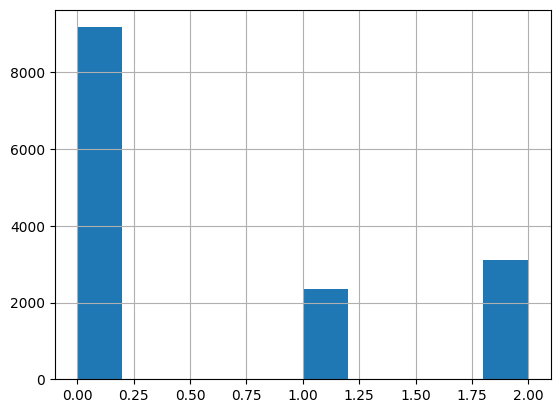

In [4]:
inputs = df['text']
labels = df['target']
labels.hist()

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [6]:
train_text, test_text, train_labels, test_labels = train_test_split(inputs,labels)

In [7]:
vectorizer = CountVectorizer()
train_text_vectors = vectorizer.fit_transform(train_text)
test_text_vectors = vectorizer.transform(test_text)

In [8]:
model = LogisticRegression(max_iter=500)
model.fit(train_text_vectors, train_labels)
print("Train acc:", model.score(train_text_vectors, train_labels))
print("Test acc:", model.score(train_text_vectors, train_labels))

Train acc: 0.9551912568306011
Test acc: 0.9551912568306011


In [9]:
Pr_train = model.predict(train_text_vectors)
Pr_test = model.predict(test_text_vectors)
print("Train AUC:", roc_auc_score(train_labels, Pr_train, multi_class='ovo'))
print("Test AUC:", roc_auc_score(test_labels, Pr_test, multi_class='ovo'))

AxisError: ignored